In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed data
df = pd.read_csv('../data/processed_data.csv')
print(df.head())


            Timestamp How old are you?  What industry do you work in?  \
0  4/27/2021 11:02:10            25-34   Education (Higher Education)   
1  4/27/2021 11:02:22            25-34              Computing or Tech   
2  4/27/2021 11:02:38            25-34  Accounting, Banking & Finance   
3  4/27/2021 11:02:41            25-34                     Nonprofits   
4  4/27/2021 11:02:42            25-34  Accounting, Banking & Finance   

                                  Job title  \
0        Research and Instruction Librarian   
1  Change & Internal Communications Manager   
2                      Marketing Specialist   
3                           Program Manager   
4                        Accounting Manager   

  If your job title needs additional context, please clarify here:  \
0                                                NaN                 
1                                                NaN                 
2                                                NaN                

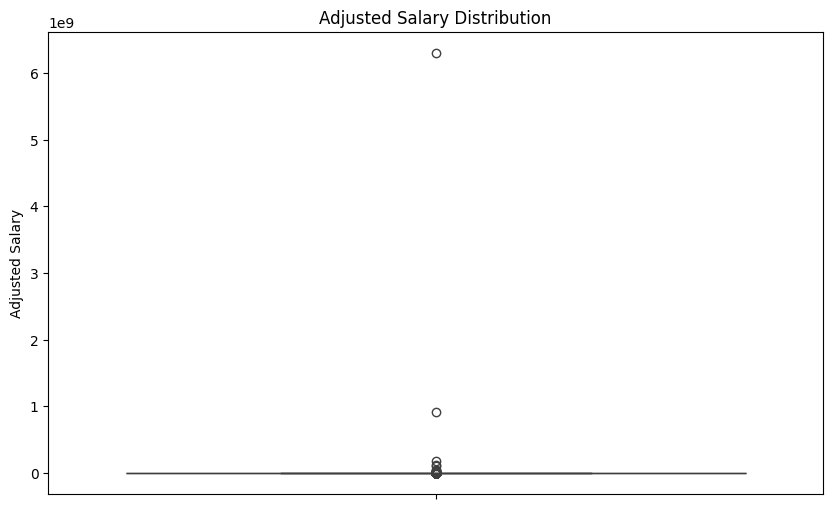

In [2]:
# Which industry pays the most?
# First Cell: Visualize the distribution to spot any outliers.
plt.figure(figsize=(10, 6))
sns.boxplot(df['Adjusted Salary'])
plt.title('Adjusted Salary Distribution')
plt.show()

In [3]:
# Second Cell: Filter out unrealistic salary values (e.g., those greater than $500,000).
df_filtered = df[df['Adjusted Salary'] < 500000]

In [4]:
#Third Cell: Recalculate the industry salaries with the filtered data.
industry_salary = df_filtered.groupby('What industry do you work in?')['Adjusted Salary'].mean().sort_values(ascending=False)
industry_salary.head()

What industry do you work in?
Commercial Building Material Distribution                         420000.0
Sports                                                            315000.0
Corporate Training                                                294000.0
Geologist                                                         273000.0
Energy (oil & gas & associated products, renewable power, etc)    265965.0
Name: Adjusted Salary, dtype: float64

In [5]:
# Step 1: Standardize country names in the "Please indicate the currency" column (now for countries)
df['Please indicate the currency'] = df['Please indicate the currency'].replace({
    'United States': 'United States',
    'US': 'United States',
    'USA': 'United States',
    'U.S.': 'United States',
    'u.s.': 'United States',
    'united states': 'United States',
    'united stated': 'United States',
    'united States': 'United States',
    '$2,175.84/year is deducted for benefits': None,  # Invalid entry, set to None
    'ARGENTINA BUT MY ORG IS IN THAILAND': 'Argentina',
    '🇺🇸': 'United States',
    'ARGENTINA': 'Argentina',
    # Add similar mappings for other invalid or redundant country entries
})

# Step 2: Group by job title and standardized country column, then calculate mean salary
role_salary = df.groupby(['Job title', 'Please indicate the currency'])['Adjusted Salary'].mean().unstack()
role_salary.head()  # Show salary comparison between countries for each role


Please indicate the currency,AUD/NZD,CAD,CHF,EUR,GBP,HKD,JPY,Other,SEK,USD,ZAR
Job title,,,,,,,,,,,
Analyst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68565.0,NaN
Brand Manager,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82687.5,NaN
Business Systems Analyst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61950.0,NaN
CAP team,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36036.0,NaN
CNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34944.0,NaN


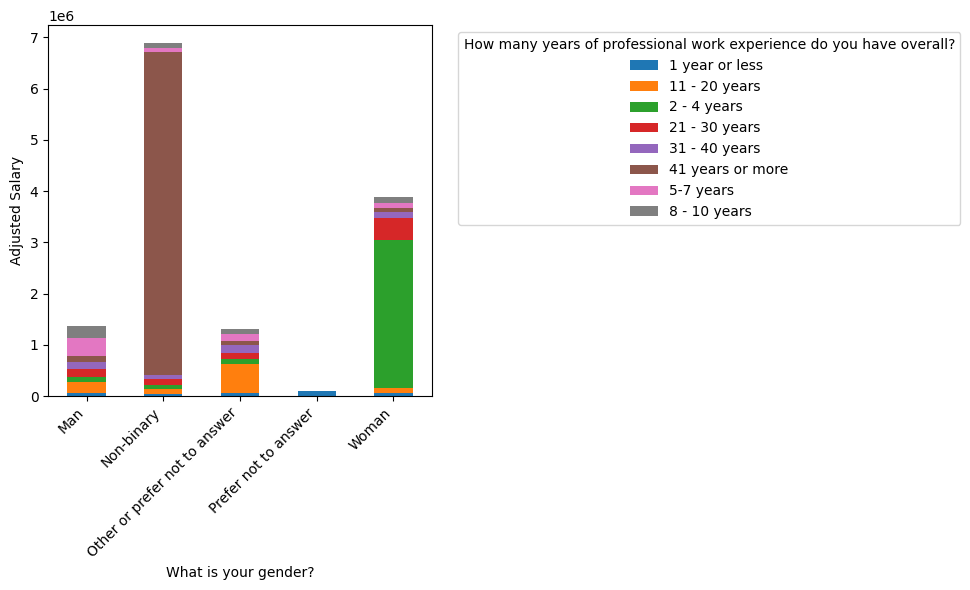

In [6]:
gender_experience_salary = df.groupby(['What is your gender?', 'How many years of professional work experience do you have overall?'])['Adjusted Salary'].mean()

# Plotting the stacked bar chart with adjustments
ax = gender_experience_salary.unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('What is your gender?')
ax.set_ylabel('Adjusted Salary')
plt.xticks(rotation=45, ha='right')  

plt.legend(title='How many years of professional work experience do you have overall?', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


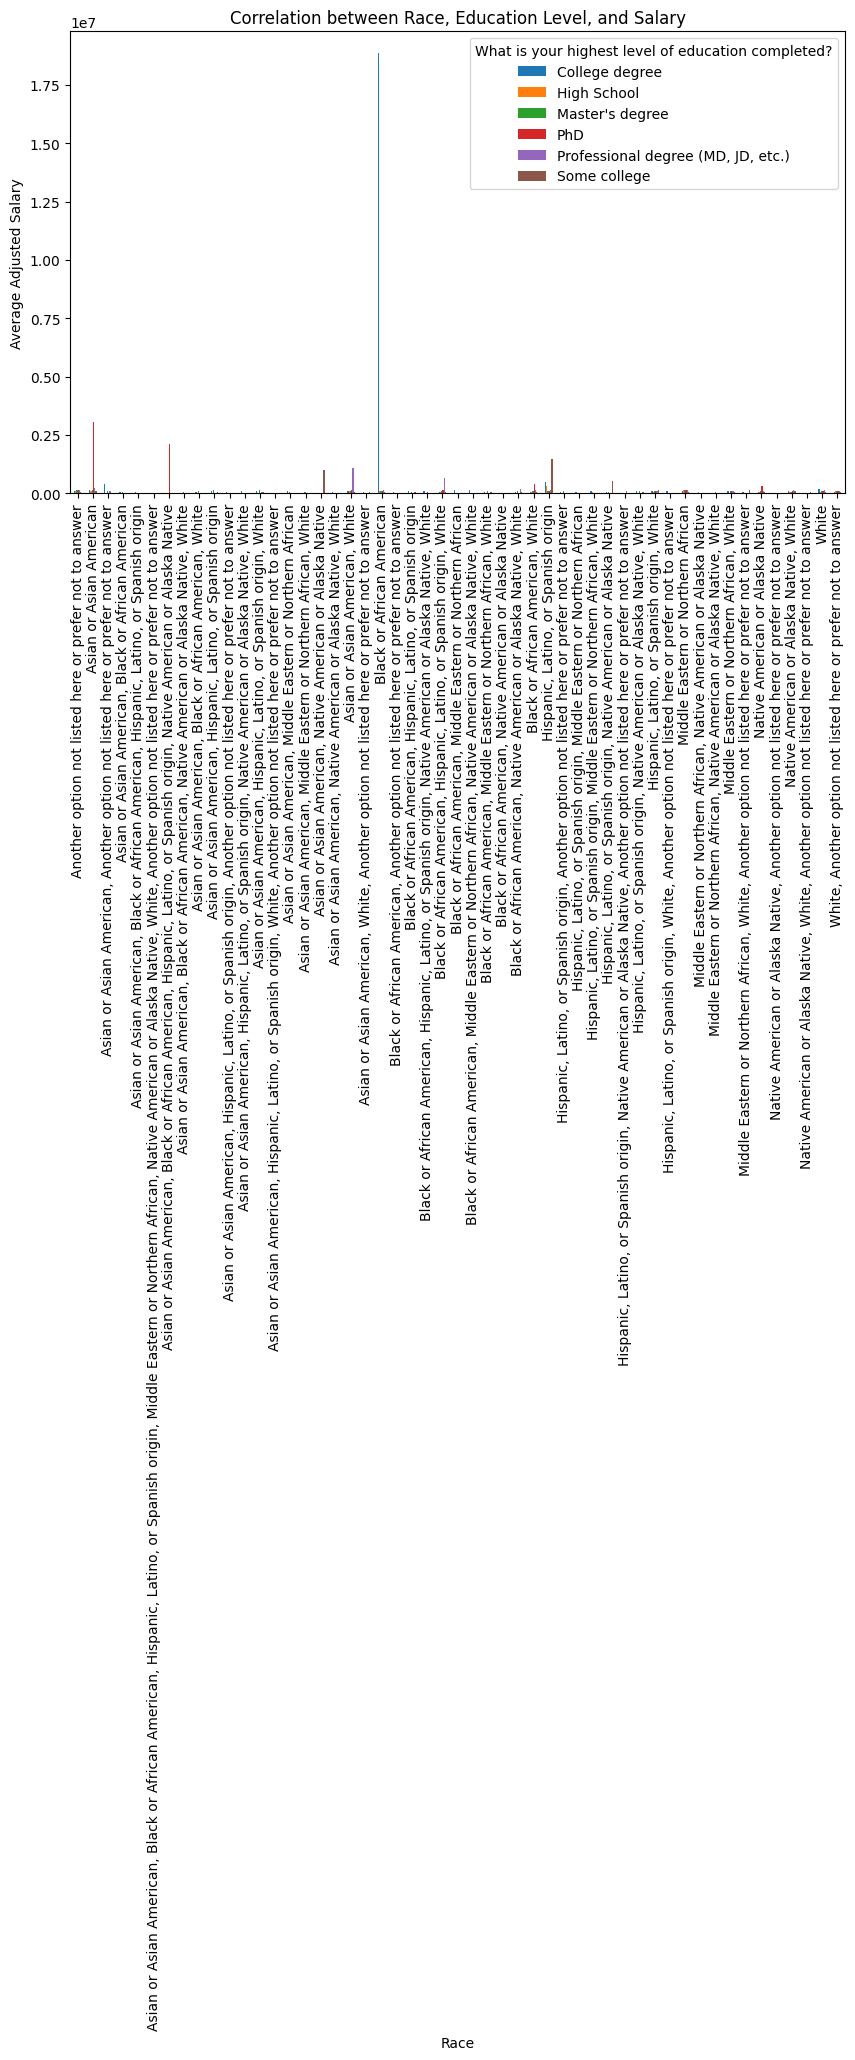

In [7]:
# How do factors like race and education level correlate with salary?
race_education_salary = df.groupby(['What is your race? (Choose all that apply.)', 'What is your highest level of education completed?'])['Adjusted Salary'].mean()
race_education_salary.unstack().plot(kind='bar', figsize=(10, 6)) 
plt.xticks(rotation=90)  
plt.title('Correlation between Race, Education Level, and Salary')
plt.ylabel('Average Adjusted Salary')
plt.xlabel('Race')
plt.show()


<Axes: xlabel='How many years of professional work experience do you have overall?'>

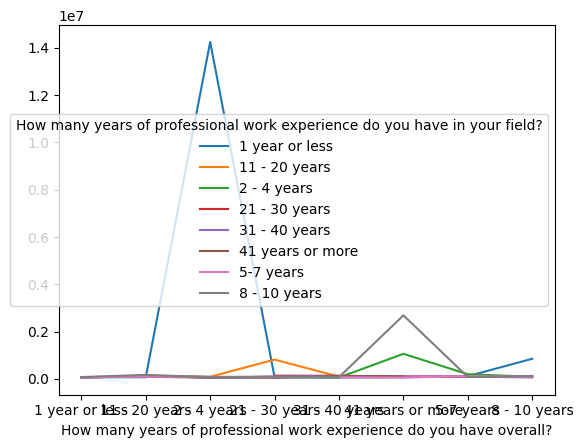

In [8]:
# Is there a “sweet spot” total work experience vs years in the specific field?
experience_field_salary = df.groupby(['How many years of professional work experience do you have overall?', 
                                      'How many years of professional work experience do you have in your field?'])['Adjusted Salary'].mean()

experience_field_salary.unstack().plot(kind='line', figsize=(10, 6))  
plt.xticks(rotation=45)  
plt.title('Total Work Experience vs. Years in Specific Field (Adjusted Salary)')
plt.ylabel('Average Adjusted Salary')
plt.xlabel('Total Work Experience')
plt.show()